<a href="https://colab.research.google.com/github/dhruvsheh/Synapse_Tasks/blob/main/crabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv("crab.csv")
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
df['Sex'].map(dict(M=1, F=0))

0       0.0
1       1.0
2       NaN
3       0.0
4       NaN
       ... 
3888    0.0
3889    0.0
3890    NaN
3891    NaN
3892    NaN
Name: Sex, Length: 3893, dtype: float64

In [5]:
df = pd.get_dummies(data = df, columns=["Sex"])


In [6]:
df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,True,False,False
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,True,False,False
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,False,True,False
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,False,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
 8   Sex_F           3893 non-null   bool   
 9   Sex_I           3893 non-null   bool   
 10  Sex_M           3893 non-null   bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 254.8 KB


In [8]:
def crab_processing(df):
  lostweight=[]
  for index,rows in df.iterrows():
         if(rows['Weight']-rows['Shucked Weight']-rows['Viscera Weight']-rows['Shell Weight']>=0):
                 lostweight.append(1)
         else:
               lostweight.append(0)
  df.insert(loc=8,column='lostweight',value=lostweight)
  return df

df_crab=crab_processing(df)
df_crab.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,lostweight,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,1,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,False,True,False


In [9]:
df_crab

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,lostweight,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,1,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8,1,True,False,False
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10,1,True,False,False
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5,1,False,True,False
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6,1,False,True,False


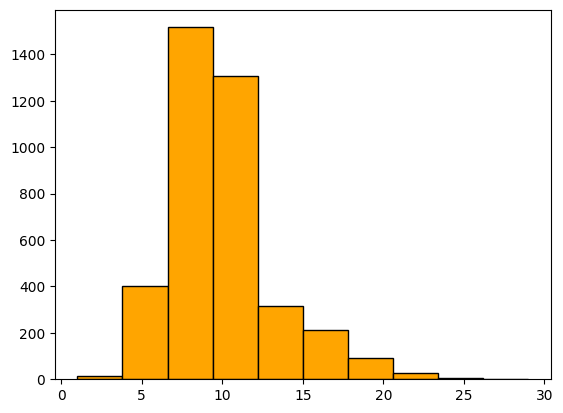

In [10]:
plt.hist(df['Age'],bins=10,color='orange',edgecolor='black')
plt.show()

In [11]:
X=df_crab.drop(columns='Age')
y=df_crab['Age']
X

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,lostweight,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,0,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,1,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,1,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,1,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
3888,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,1,True,False,False
3889,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,1,True,False,False
3890,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,1,False,True,False
3891,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,1,False,True,False


In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [13]:
y

0        9
1        6
2        6
3       10
4        6
        ..
3888     8
3889    10
3890     5
3891     6
3892     8
Name: Age, Length: 3893, dtype: int64

In [14]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
# Create an SVR object 'svr' by calling SVR()
algo=SVR()

In [15]:
algo.fit(X_train,y_train)

SVR()

In [16]:
predictions =algo.predict(X_test)
print(predictions.shape)

(1168,)


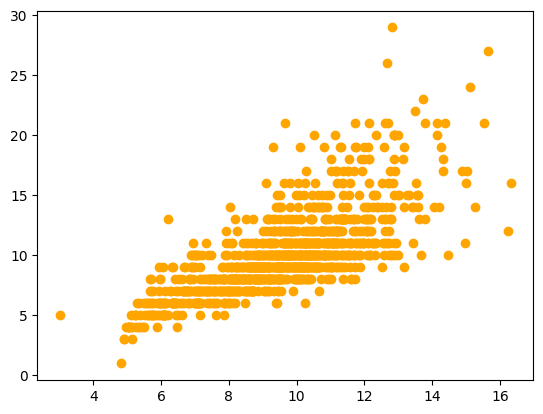

In [20]:
plt.scatter(predictions,y_test,color='orange')
plt.show()

In [22]:
algo.score(X_train,y_train)

0.5148854388784121

In [21]:
print(mean_squared_error(predictions,y_test)) #mean squared error

5.4561862228604925


In [25]:
print(round(r2_score(y_test,predictions),3))

0.505


In [ ]:
#R2 score is used to evaluate the performance of a linear regression model.
#It is the amount of the variation or sum of squares in the output dependent attribute which is predictable from the input independent variables.
#For example, an r-squared of 54% reveals that 54% of the variability observed in the target variable is explained by the regression model.
#Generally, a higher r-squared indicates more variability is explained by the model.0.51 is not that great of an r2 score.

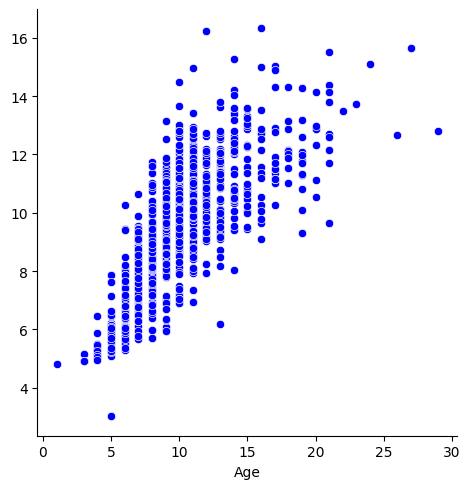

In [27]:
sns.relplot(x=y_test,y=predictions,color='blue')


In [29]:
from sklearn.metrics import max_error, d2_absolute_error_score
print(f"D2 error is: {d2_absolute_error_score(y_test, predictions)}")
# A model that always uses the empirical median of y_true as constant prediction, disregarding the input features, gets a score of 0.0

D2 error is: 0.348542282791802
